# MNIST-Neural Network-Two Hidden Layers with Variable Optimziers

In [1]:
# coding: utf-8
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import math

sys.path.append(os.pardir)
from common.mnist import *
from common.functions import *
from common.layers import *
from common.util import *
from common.optimizer import *

## Multilayer Neural Network Model

In [2]:
import sys, os
from collections import OrderedDict
from scipy import stats
from pandas import DataFrame

class TwoLayerNet2:
    def __init__(self, input_size, hidden_layer1_size, hidden_layer2_size, output_size, weight_init_std = 0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_layer1_size)
        self.params['b1'] = np.zeros(hidden_layer1_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_layer1_size, hidden_layer2_size)
        self.params['b2'] = np.zeros(hidden_layer2_size)
        self.params['W3'] = weight_init_std * np.random.randn(hidden_layer2_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine3'] = Affine(self.params['W3'], self.params['b3'])

        self.lastLayer = SoftmaxWithCrossEntropyLoss()
            
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
        
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    def backpropagation_gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        din = 1
        din = self.lastLayer.backward(din)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            din = layer.backward(din)

        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        grads['W3'], grads['b3'] = self.layers['Affine3'].dW, self.layers['Affine3'].db

        return grads
    
    def learning(self, learning_rate, x_batch, t_batch, optimizer):
        grads = self.backpropagation_gradient(x_batch, t_batch)
        optimizer.update(self.params, grads)

## Learning and Validation

In [3]:
data = mnist_data("/Users/shhwang/git/aiclass/0.Professor/data/MNIST_data/.")
(img_train, label_train), (img_validation, label_validation), (img_test, label_test) = data.load_mnist(flatten=True, normalize=True, one_hot_label=True)

optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['Nesterov'] = Nesterov()
optimizers['AdaGrad'] = AdaGrad()
optimizers['RMSprop'] = RMSprop()
optimizers['Adam'] = Adam()

num_epochs = 10
train_size = img_train.shape[0]
batch_size = 1000
learning_rate = 0.1

networks = {}
train_errors = {}
validation_errors = {}
test_accuracy_values = {}

for key in optimizers.keys():
    networks[key] = TwoLayerNet2(input_size=784, hidden_layer1_size=128, hidden_layer2_size=128, output_size=10)
    train_errors[key] = [] 
    validation_errors[key] = []
    test_accuracy_values[key] = []
    
x_list = []

num_batch = math.ceil(train_size / batch_size)
print(num_batch)

55


In [4]:
for i in range(num_epochs):
    j = 0

    for j in range(num_batch):
        x_batch = img_train[j * batch_size : j * batch_size + batch_size]
        t_batch = label_train[j * batch_size : j * batch_size + batch_size]
        for k in optimizers.keys():
            x_list.append(i)
            networks[k].learning(learning_rate, x_batch, t_batch, optimizers[k])
    
            train_loss = networks[k].loss(x_batch, t_batch)
            train_errors[k].append(train_loss)

            validation_loss = networks[k].loss(img_validation, label_validation)
            validation_errors[k].append(validation_loss)    

            test_accuracy = networks[k].accuracy(img_test, label_test)
            test_accuracy_values[k].append(test_accuracy)
    print("{0}th iteration completed".format(i))

0th iteration completed
1th iteration completed
2th iteration completed
3th iteration completed
4th iteration completed
5th iteration completed
6th iteration completed
7th iteration completed
8th iteration completed
9th iteration completed


In [7]:
for k in optimizers.keys():
    print(len(train_errors[k]))

550
550
550
550
550
550


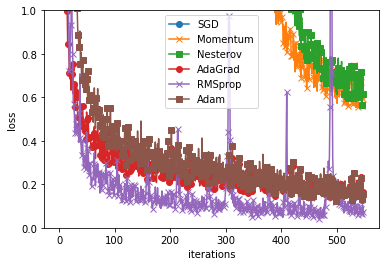

In [9]:
markers = {"SGD": "o", "Momentum": "x", "Nesterov": "s", "AdaGrad": "o", "RMSprop": "x", "Adam": "s"}
x_list = np.arange(550)

for k in optimizers.keys():
    plt.plot(x_list, train_errors[k], marker=markers[k], markevery=2, label=k)
    
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()